In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os


Make Sure you have 3 images downloaded in your folder..
if not then download from following link
[imgs_link](https://drive.google.com/open?id=1sR3H_eOI8NJD4u_jWl5g8RJIrR9-SiHH)

In [0]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [0]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    return image

Cv2 function does not get proper pixels value of rgb channel so we can use range of 5 difference to get same value of rgb and to identify the neutral colours.

In [0]:
def get_colors(image):
  modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
  clf = KMeans()
  labels = clf.fit_predict(modified_image)
  counts = Counter(labels)
  #print(counts)
  center_colors = clf.cluster_centers_
  #print("Count Keys")
  #print(counts.keys())
  new_colors = []
  hex_colors=[]
  ordered_colors = [center_colors[i]/255 for i in counts.keys()]
  for i in range(0,len(ordered_colors)):
    temp = RGB2HEX(ordered_colors[i]*255)
    
    red = int(temp[1]+temp[2],16)
    green = int(temp[3]+temp[4],16)
    blue = int(temp[5]+temp[6],16)
    #taken difference of 5 to get exact neutral colour from real life images
    if(abs(red - green)>5 and abs(green - blue)>5 and abs(red - blue)>5):
      new_colors.append(ordered_colors[i])
      hex_colors.append(RGB2HEX(ordered_colors[i]*255))
    else:
      counts.pop(i,None)
      #print("i print")
      #print(i)
  

  
  plt.figure()
  plt.pie(counts.values(), labels = hex_colors, colors = new_colors)
  #print("count_values")
  #print(counts.values())
  #print("hex")
  #print(hex_colors)
 
  #print("ord")
  #print(ordered_colors)
  
  return (hex_colors)
  

Final dominant colors eliminating neutral colors
['#321609', '#6c601f', '#761e0b', '#b26a0c', '#ac2d0b', '#7fb210', '#c9ad87', '#cf9e0d']


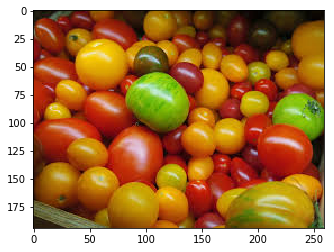

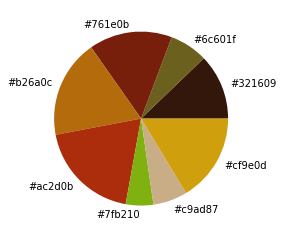

In [5]:
print("Final dominant colors eliminating neutral colors")
print(get_colors(get_image('download1.jpg')))

Final dominant colors eliminating neutral colors
['#fb1601', '#b00e06']


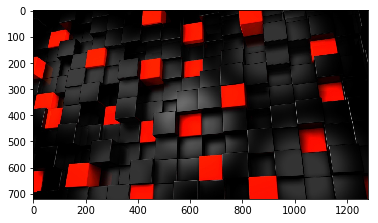

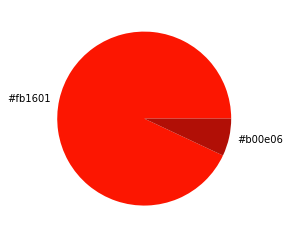

In [6]:
print("Final dominant colors eliminating neutral colors")
print(get_colors(get_image('final_test.jpg')))



If we upload purely black(Neutral Colour) image, then it will return null list and no any plot will be printed.

Final dominant colors eliminating neutral colors


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)


[]


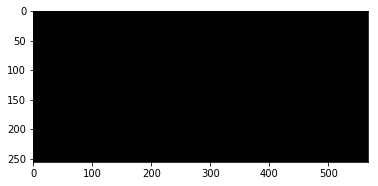

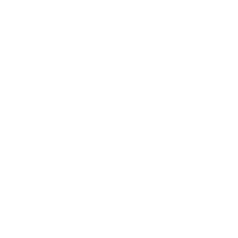

In [7]:
print("Final dominant colors eliminating neutral colors")
print(get_colors(get_image('test4.jpg')))